In [1]:
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
%matplotlib inline

In [2]:
[season_map_parsed, season_map_cleaned, theOfficeIMDBRating] = pickle.load(open('./the_office_transcript.pickle', 'rb'))

In [3]:
dialogue_per_season_per_character = {}
for season in season_map_parsed:
    dialogue_per_season_per_character[season] = {}
    for episode in season_map_parsed[season].values():
        for dialogue in episode:
            try:
                dialogue_per_season_per_character[season][dialogue[0]] = dialogue_per_season_per_character[season][dialogue[0]]  + 1
            except:
                dialogue_per_season_per_character[season][dialogue[0]] = 1
character_dialogue_count = pd.DataFrame(dialogue_per_season_per_character)
character_dialogue_count = character_dialogue_count.reset_index().rename(columns={'index':'character'})

### 1. Which character drives the seasons? Using dialogues as measure of that

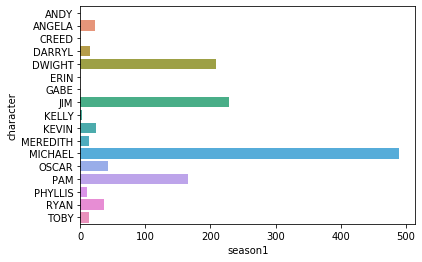

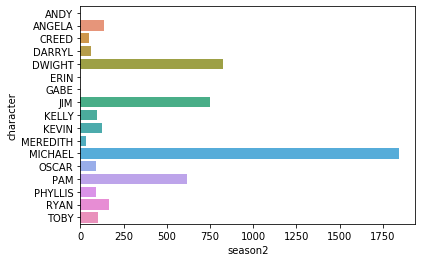

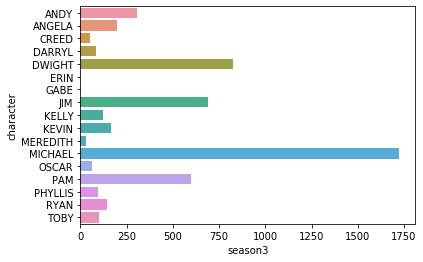

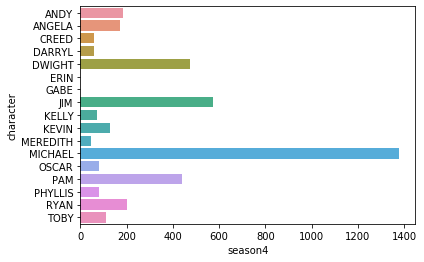

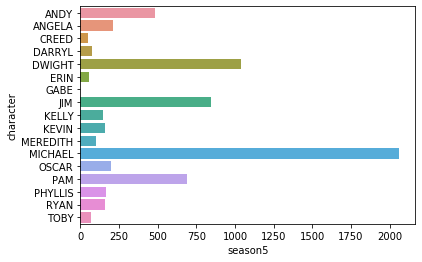

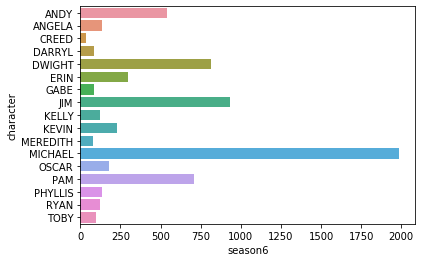

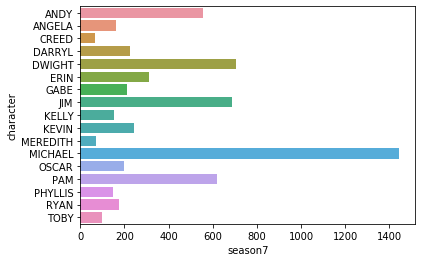

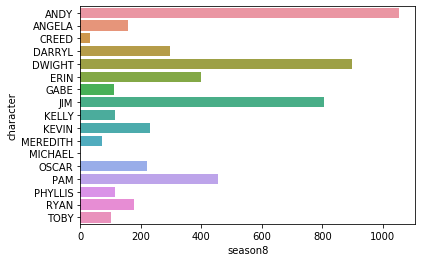

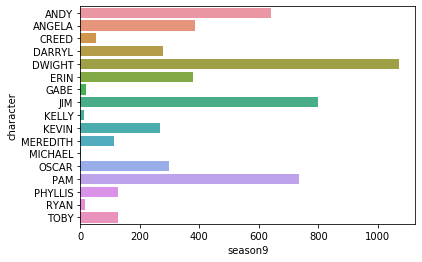

In [4]:
for season in [ 'season'+str(i) for i in range(1,10) ]:
    g = sns.barplot(x=season, y='character', data=character_dialogue_count)
    plt.show()

#### Clearly Michael led first 7 seasons until the actor playing the character left the show, season 8 is led by Andy and that might not have received good feedback, and we see a change in season 9, with Dwight leading the show! - We do observe worst rating for the series in season 8 below! Season 9 saw a comeback after Dwight leads the show

In [5]:
office_avg_rating = theOfficeIMDBRating.groupby(['Season']).mean().reset_index()

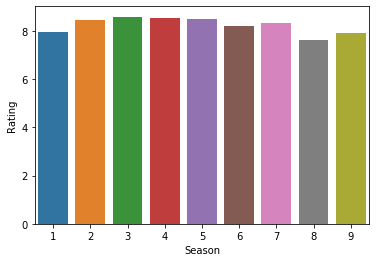

In [6]:
g = sns.barplot(x='Season', y='Rating', data=office_avg_rating)

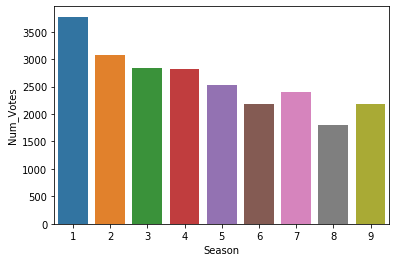

In [7]:
g = sns.barplot(x='Season', y='Num_Votes', data=office_avg_rating)

### 2. What are most frequently used words by each character?

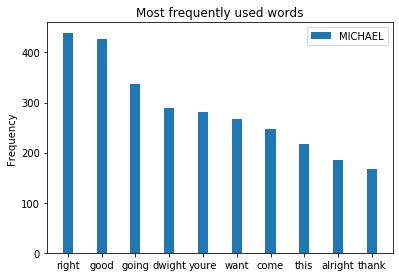

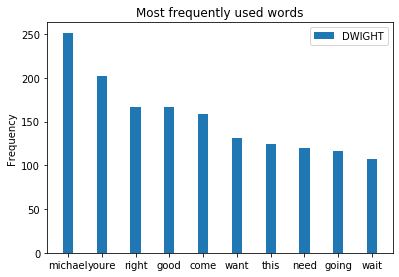

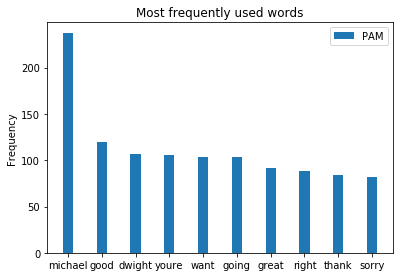

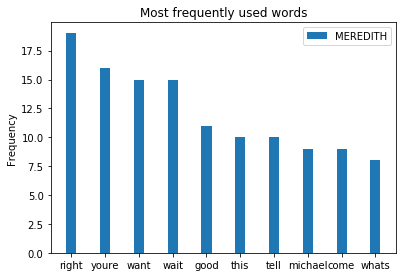

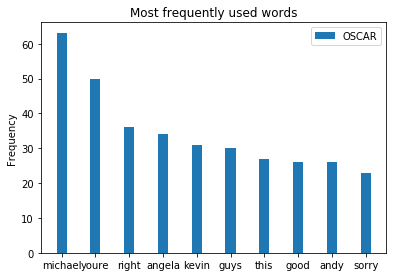

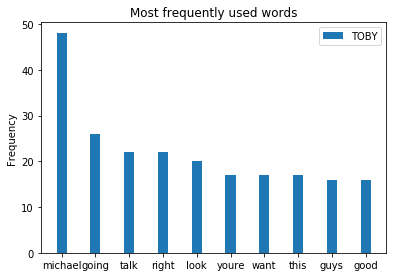

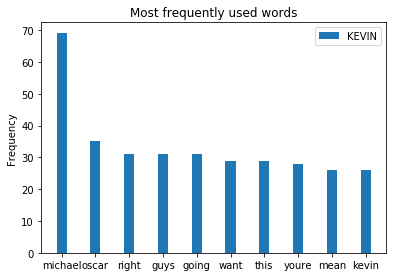

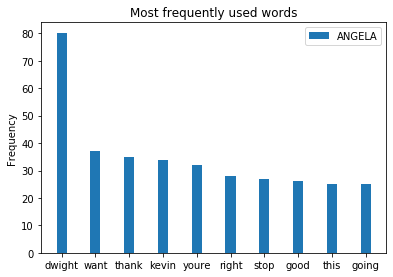

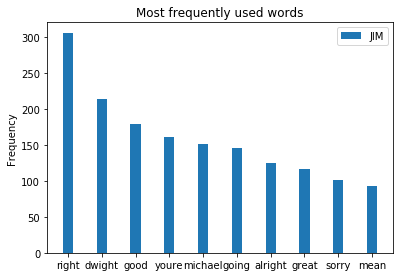

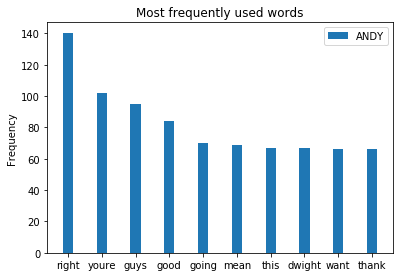

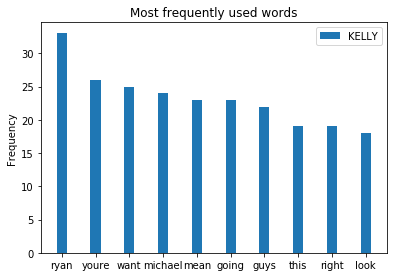

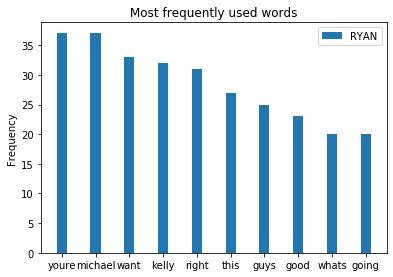

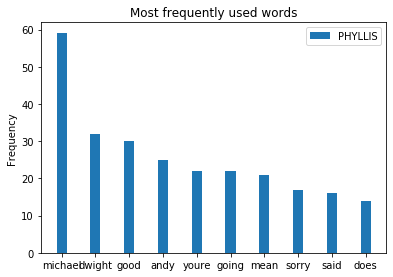

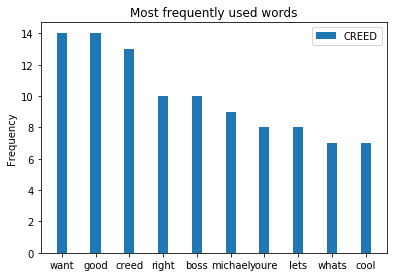

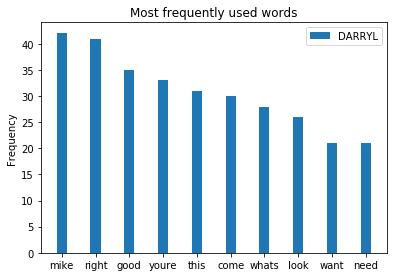

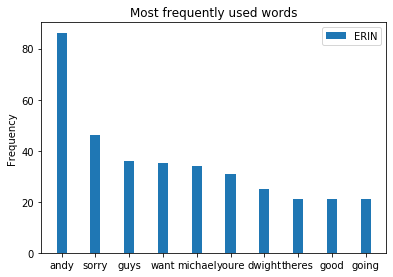

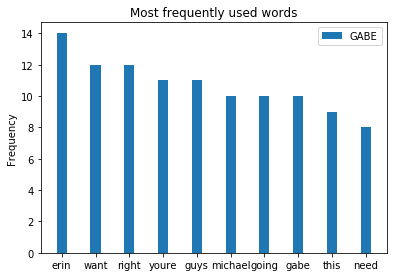

In [8]:
WORDS_TO_IGNORE = ['yeah', 'dont', 'know', 'just', 'what', 'like', 'well', 'okay', 'really', 'think', 'that', 'thats']
# ideally find out words count and ignore the words shared by different characters

words_per_character = {}
for season in season_map_cleaned:
    for episode in season_map_cleaned[season].values():
        for dialogue in episode:
            name = dialogue[0];
            words = dialogue[1].split();
            if not ( name in words_per_character.keys() ):
                words_per_character[name] = {}
            for word in words:          
                if len(word) <= 3 or ( word in WORDS_TO_IGNORE ): #words more than 3 characters 
                    continue;
                try:
                    words_per_character[name][word] = words_per_character[name][word] + 1
                except:
                    words_per_character[name][word] = 1

for character in words_per_character.keys():
    words_map = words_per_character[character]
    words_list = [ [int(words_map[key]), key] for key in words_map.keys() ]
    words_list.sort(reverse=True)
    words_list = words_list[0:10]
    
    fig = plt.figure()
    ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
    plt.bar(range(10), [ v[0] for v in words_list ], 0.3, label=character);
    
    plt.ylabel('Frequency')
    plt.title('Most frequently used words')
    ax.set_xticks(range(10))
    ax.set_xticklabels([ v[1] for v in words_list ] )
    plt.legend()

#### Of all the characters Michael mentions DWIGHT the most and vice versa. Except Angela and Andy, top floor people talk a lot with/about Michael. This also supports great lot dialogues the Michael character had, as story revolves around him. JIM doesn't mention PAM as much, and neither does PAM! For example, see Kelly mentioning Ryan a lot and vice versa.

### 3. What are most spoken two word phrases by each character?

In [9]:
phrases_per_character = {}
for season in season_map_cleaned:
    for episode in season_map_cleaned[season].values():
        for dialogue in episode:
            name = dialogue[0];
            words = dialogue[1].split();
            if not ( name in phrases_per_character.keys() ):
                phrases_per_character[name] = {}
            words = [ word for word in words if not ( len(word) <= 3 or ( word in WORDS_TO_IGNORE ) ) ]
            for i in range(len(words)-1):
                phrase = words[i] + ' ' + words[i+1];
                try:
                    phrases_per_character[name][phrase] = phrases_per_character[name][phrase] + 1
                except:
                    phrases_per_character[name][phrase] = 1

for character in phrases_per_character.keys():
    words_map = phrases_per_character[character]
    words_list = [ [int(words_map[key]), key] for key in words_map.keys() ]
    words_list.sort(reverse=True)
    words_list = words_list[0:10]
    
    print( character, ":\n", [ v[1] for v in words_list ] )

MICHAEL :
 ['michael scott', 'good good', 'stop stop', 'right right', 'dunder mifflin', 'youre right', 'whoa whoa', 'whats going', 'guys guys', 'youre going']
DWIGHT :
 ['dwight schrute', 'wait wait', 'regional manager', 'assistant regional', 'dunder mifflin', 'youre going', 'whoa whoa', 'michael michael', 'wait minute', 'good morning']
PAM :
 ['dunder mifflin', 'conference room', 'whats going', 'michael scott', 'youre going', 'good morning', 'whats wrong', 'good luck', 'wait wait', 'mifflin this']
MEREDITH :
 ['wait wait', 'wait minute', 'poor richards', 'minute wait', 'coming coming', 'youre right', 'unless theres', 'this crazy', 'theres ribs', 'there there']
OSCAR :
 ['youre right', 'whoa whoa', 'thank michael', 'state senator', 'good luck', 'good idea', 'dunder mifflin', 'doesnt make', 'angelas husband', 'youre thinking']
TOBY :
 ['thanks michael', 'whats going', 'toby flenderson', 'talk second', 'need talk', 'human resources', 'come dwight', 'blah blah', 'whats called', 'want look

#### One would have expected ERIN and PAM to speak 'dunder mifflin' the most givemn they had most proportion of their roles as a receptionist! Angela is about 'party planning'! INTERESTING to see Toby say 'thanks michael' the most. Dwight is the 'regional manger'! Most of Jim's phrases are when he is acting gullible while playing pranks - 'wait wait' , 'whoa whoa', etc

### 4. Most defining words for each character

In [10]:
CHARACTERS = ['MICHAEL', 'JIM', 'PAM', 'DWIGHT', 'OSCAR', 'ANGELA',
                   'KELLY', 'TOBY', 'ANDY', 'PHYLLIS', 'RYAN', 'GABE',
                   'ERIN', 'DARRYL', 'CREED', 'KEVIN', 'MEREDITH'];

In [11]:
dialogues = []
for character in CHARACTERS:
    dialogues.append( ' '.join(words_per_character[character]) )
vectorizer = TfidfVectorizer(min_df=2, ngram_range=(1,2), norm='l2',
                             smooth_idf=True, sublinear_tf=False, use_idf=True)

In [12]:
X = vectorizer.fit_transform(dialogues)
similarity = (X * X.T).todense()

In [13]:
close_users = []
limit = 0.45
for i in range(similarity.shape[0]):
    for j in range(similarity.shape[1]):
        if i == j:
            continue
        if similarity[i,j] > limit:
            pair = [ CHARACTERS[i], CHARACTERS[j] ]
            pair.sort()
            close_users.append('_'.join(pair))
close_users = [ x.split('_') for x in set(close_users) ]
print('Users most close are :', close_users)

Users most close are : [['JIM', 'MICHAEL'], ['DWIGHT', 'MICHAEL'], ['DWIGHT', 'JIM']]


In [14]:
word_features = vectorizer.get_feature_names();
for i in range(X.shape[0]):
    word_values = []
    for j in range(X.shape[1]):
        if(X[i,j] == 0):
            continue
        word_values.append([X[i,j], word_features[j]])
    word_values.sort(reverse=True)
    top10DefiningWords = word_values[0:10]
    print('\nCharacter ', CHARACTERS[i], ":")
    print( [ x[1] for x in top10DefiningWords ] )


Character  MICHAEL :
['zits', 'yuck', 'yeesh', 'yams', 'wrestle', 'wrapping', 'worst thing', 'woooo', 'woohoo', 'woody']

Character  JIM :
['and', 'none', 'because', 'work', 'meant', 'york city', 'yesss', 'yeesh', 'yawns', 'yankees']

Character  PAM :
['oh', 'again', 'yearbook', 'yeah', 'writer', 'wound', 'worlds tiniest', 'woods', 'will grace', 'wilkes barre']

Character  DWIGHT :
['slip', 'no', 'yours', 'youngstown', 'youngest', 'yesss', 'xterras', 'writer', 'wrestle', 'wound']

Character  OSCAR :
['thats', 'just', 'will marry', 'wheelchair', 'west', 'weed', 'webmd', 'wash hands', 'user', 'updates']

Character  ANGELA :
['none', 'youve kidding', 'you', 'worst breakup', 'without', 'wisdom', 'winwin', 'will grace', 'whack', 'webmd']

Character  KELLY :
['withdrawn', 'webcam', 'warrior', 'vick', 'vibrator', 'unfortunate error', 'underestimated', 'ughh', 'tune', 'training program']

Character  TOBY :
['wilderness', 'violate', 'vent', 'vaginas', 'twin', 'trains', 'traditional', 'thumb', 

#### haha most funny one is 'sprout', 'tapeworm' and 'taliban' for CREED, that character was weird! Interesting to see these words mostly being on the end size of characters, made me doubt my code!